<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №5. Эндогенные  колебания  численности  населения  в  нелинейной  демографической модели.**
###Нелинейная модель демографических колебаний.

Система, моделирующая динамику численности населения земледельческой общины имеет вид:

$
\left\{
\begin{array}{cc}
\cfrac{dn}{dt} = r · n · (1 - \frac{n}{k}), \ (1) \\
\cfrac{dk}{dt} = q · \frac{n}{n · (q-1)+1}-n, \ (2) \\
\end{array}
\right.
$

где:
> * $r \ -$ темпы приростов населения, обычно колеблются в пределах $0,01<r<0,02$;
> * $q$ показывает, сколько человек, включая себя, может в благоприятных условиях прокормить один земледелец; изменяется в диапазоне $1,2<q<2$.;
> * $n \ -$ безразмерная нормированная равновесным уровнем численность населения;
> * $k \ -$ нормированный равновесным значением запас продовольствия.

In [ ]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (3, 3)

Параметры, согласно номеру варианта (1):    
$
r = 0.01 \\ 
q = 1.2 $

In [ ]:
def model(y, t, r = 0.01, q = 1.2):
    n, k = y
    dn = r * n * (1 - n / k)
    dk = q * n / (n * (q - 1) + 1) - n
    return [dn, dk]

In [ ]:
# Отрисовка графика численного решения компонент системы эндогенных колебаний
def plot_solution(y1, y2, time, color1 = "b", color2 = "orange"):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = color1, label = "N1")
    plt.plot(time, y2, c = color2, label = "N2")
    plt.xlabel("time")          
    plt.ylabel("N1, N2")
    plt.title(f"Численное решение системы эндогенных колебаний")
    plt.legend()
    plt.grid(True)              
    plt.show()

# Отрисовка графика фазового портрета системы эндогенных колебаний
def plot_phase_portrait(y1, y2, color = "b", starts = None, nulls = None):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1], c = color)
    if nulls is not None:
        for i in nulls:
            plt.scatter(i[0], i[1], c = color)
    plt.xlabel("N1")
    plt.ylabel("N2")
    plt.title(f"Фазовый портрет системы эндогенных колебаний")
    plt.grid(True)
    plt.show()

In [ ]:
def analyze(f, nulls, starts, time_end = 1000):
    time = np.linspace(0, time_end, 5000)
    for i in starts:
        print(f"В точке {i}")
        w = integr.odeint(f, i, time, ())
        y1 = w[:, 0]
        y2 = w[:, 1]
        
        plot_solution(y1, y2, time)
        plot_phase_portrait(y1, y2, starts = [i], nulls = nulls)

Положение равновесия системы первого приближения, также как и 
положение равновесия системы, является асимптотически устойчивым фокусом, и обе системы порождают затухающие колебания.

В точке [0.3, 0.3]


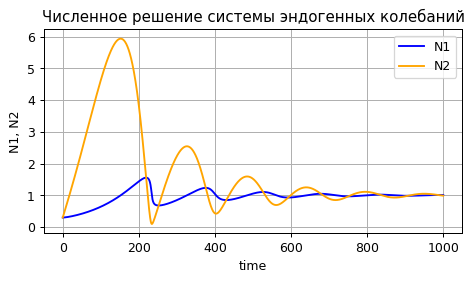

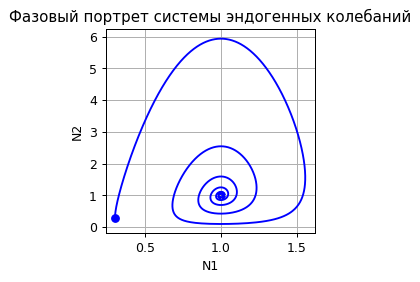

В точке [0.4, 0.4]


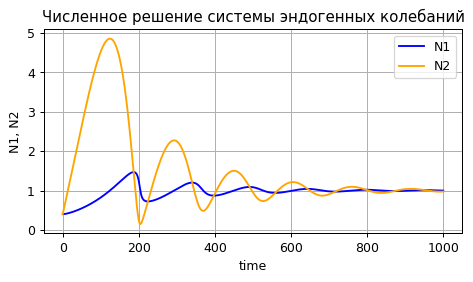

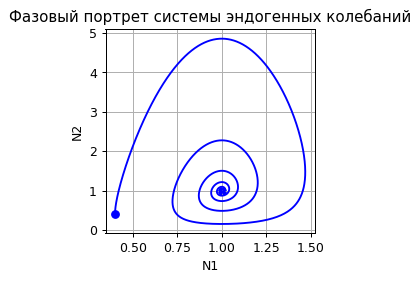

В точке [0.5, 0.5]


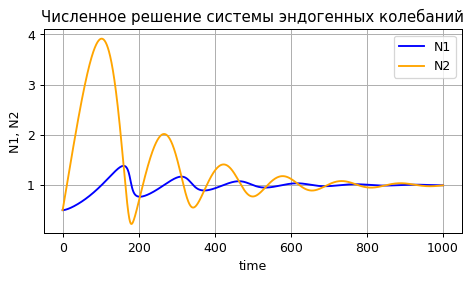

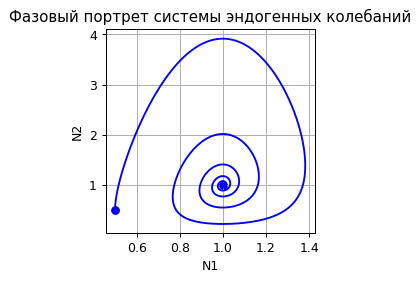

In [ ]:
initial_points = [[0.3, 0.3],
          [0.4, 0.4],
          [0.5, 0.5]]

special_points = [[1, 1]]

analyze(model, special_points, initial_points)

**Вывод**

Поскольку собственные числа матрица системы являются комплексными корнями, то тип стационарной точки - ассимптотически устойчивый фокус. Длительность первого цикла - 175 промежутков времени. Второго - 75 временных промежутков. По графику видно, что глубина сокращения численности населения в первый цикл - почти в два раза. Временной лаг, на который население запаздывает из-за того, что реагирует на сокращение запасов продовольствия примерно равен 20 временным промежуткам. Примечание: При возрастания параметров r и q длина периода растет.
